<h3> Collision Handing in HashTables </h3>

In [28]:
class HashTable:  
    def __init__(self):
        self.MAX = 10
        self.arr = [None for i in range(self.MAX)]
        
    def get_hash(self, key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, index): #this is a in built function in python which Return the value of a at index b.
        h = self.get_hash(index)
        return self.arr[h]
    
    def __setitem__(self, key, val): # this is a in built function in python which Set the value of a at index b to c.
        h = self.get_hash(key)
        self.arr[h] = val    
        
    def __delitem__(self, key): #this is a in built function in python which Remove the value of a at index b.
        h = self.get_hash(key)
        self.arr[h] = None

In [29]:
t = HashTable()
t.get_hash("march 6")

9

In [30]:
t.get_hash("march 17")

9

<p style="font-size:15px">In the above example you can see both march 17 and march 6 returns the hash value of 9 , so this is where the <strong>collision</strong> happen when two keys returns the same index value now we will see what happens if we try to store value for this index</p>

In [31]:
t["march 6"] = 120 #now we will assign some values to each key and see what does it show 
t["march 8"] = 67
t["march 9"] = 4
t["march 17"] = 459

In [32]:
t["march 6"] 

459

<p> here you can clearly see the value on <strong>"march 6"</strong> is being returned as 459 because the value of <strong>"march 17"</strong>  has also the same index where it is storing the value so it overrides the value of <strong>"march 6"</strong> </p> 

<ul>Now to handle such situations we have two approaches of collision handling :
    <li> Chaining method </li>
    <li> Linear Probing </li>
<ul/>

<h3>Chaining Method</h3>

<p> This method of collision Handling creates a list or linked list at each index for storing the value , so that mutliple keys can be inserted in one index if they have the same hashing value</p>

In [33]:
class HashTable:  
    def __init__(self):
        self.MAX = 10
        self.arr = [[] for i in range(self.MAX)] # here the only change we did was instead of NONE we are looping through a empty list
        
    def get_hash(self, key): #similar hashing helper function
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, key): #here instead of index we will pass the key value as if we had passed index then the whole list of elements at the particular index would have returned.
        arr_index = self.get_hash(key) 
        for kv in self.arr[arr_index]: #kv :means key,value 
            if kv[0] == key: #if the key matches return the value attached to it 
                return kv[1]
            
    def __setitem__(self, key, val): #update function which handle the collision 
        h = self.get_hash(key)
        found = False # variable to check whether key exists or not 
        for idx, element in enumerate(self.arr[h]): #now we have a linked list of items at each index value so we need to iterate through it 
            if len(element)==2 and element[0] == key:
                self.arr[h][idx] = (key,val) #update the list and store the value in the form of tuple as tuples are immutable
                found = True #change the value of found to true
        if not found:  #if not found then as usual 
            self.arr[h].append((key,val))
        
    def __delitem__(self, key):
        arr_index = self.get_hash(key)
        for index, kv in enumerate(self.arr[arr_index]):
            if kv[0] == key:
                print("del",index)
                del self.arr[arr_index][index]

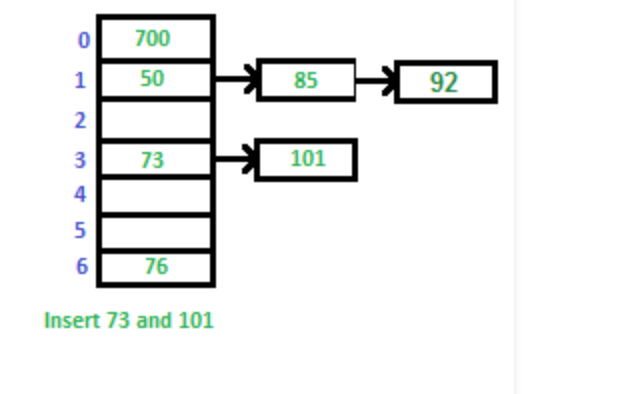

In [51]:
from IPython.display import Image
Image(filename='C:/Users/prakhar/Desktop/Python_Data_Structures_and_Algorithms_Implementations/Images/Chaining_method.png',width=800, height=400)
#save the images from github to your local machine and then give the absolute path of the image 

<p>pictorial Representaion of Chaining Method</p>

In [42]:
t = HashTable()
t["march 6"] = 310
t["march 7"] = 420
t["march 8"] = 67
t["march 17"] = 63457

In [43]:
t["march 6"]  #see here the value is not over written because we have managed the collision

310

In [44]:
t["march 17"] 

63457

In [45]:
t.arr #see here now we are able to store mutiple values on one index 

[[('march 7', 420)],
 [('march 8', 67)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 6', 310), ('march 17', 63457)]]

In [46]:
t["march 6"] = 11

In [47]:
t.arr

[[('march 7', 420)],
 [('march 8', 67)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 6', 11), ('march 17', 63457)]]

In [48]:
t["march 6"]

11

In [49]:
del t["march 6"]


del 0


In [50]:
t.arr #deleting a particular key 


[[('march 7', 420)],
 [('march 8', 67)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 17', 63457)]]